# ⚡ XOR Problem: Neural Network Solution

**Chapter 6.1**: Solving the XOR problem with feedforward neural networks

This notebook demonstrates how to solve the XOR problem, which cannot be solved by a single perceptron but requires a multi-layer neural network.

## Theory Background

**XOR Function**: The exclusive OR function outputs 1 when inputs differ, 0 when they match:
- XOR(0,0) = 0
- XOR(0,1) = 1
- XOR(1,0) = 1
- XOR(1,1) = 0

**Linear Separability**: XOR is not linearly separable - no single line can separate the classes.

**Solution**: Use a hidden layer to transform the input space, making it linearly separable.

## XOR Problem Visualization

Let's first visualize why XOR cannot be solved with a linear classifier.

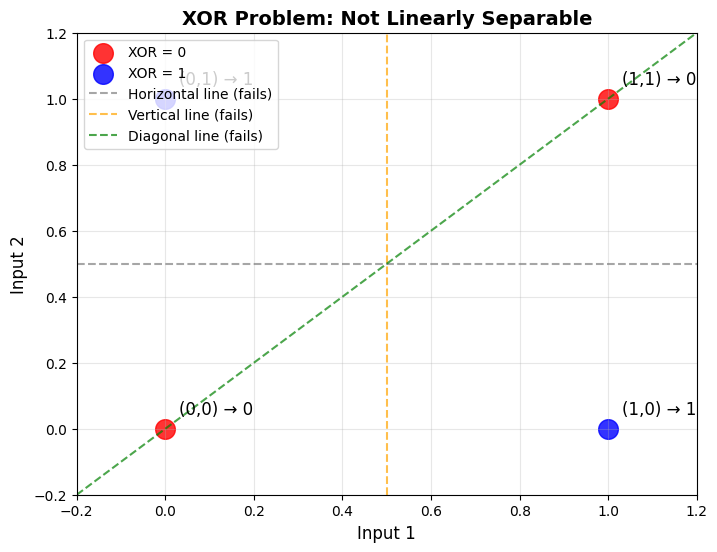

XOR Truth Table:
Input 1 | Input 2 | Output
--------|---------|--------
   0    |    0    |   0
   0    |    1    |   1
   1    |    0    |   1
   1    |    1    |   0

Observation: No single straight line can separate the red points (0) from blue points (1)
This is why we need a multi-layer neural network!


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Plot the XOR problem
plt.figure(figsize=(8, 6))
colors = ['red', 'blue']
labels = ['XOR = 0', 'XOR = 1']

for i in range(2):
    mask = y == i
    plt.scatter(X[mask, 0], X[mask, 1], c=colors[i], label=labels[i], s=200, alpha=0.8)

# Annotate points
for i, (x, label) in enumerate(zip(X, y)):
    plt.annotate(f'({x[0]},{x[1]}) → {label}', 
                xy=(x[0], x[1]), xytext=(10, 10), 
                textcoords='offset points', fontsize=12)

# Try to draw potential linear separators (all fail)
x_line = np.linspace(-0.2, 1.2, 100)

# Show that no single line can separate the classes
plt.plot(x_line, 0.5 * np.ones_like(x_line), '--', color='gray', alpha=0.7, label='Horizontal line (fails)')
plt.plot(0.5 * np.ones_like(x_line), x_line, '--', color='orange', alpha=0.7, label='Vertical line (fails)')
plt.plot(x_line, x_line, '--', color='green', alpha=0.7, label='Diagonal line (fails)')

plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
plt.xlabel('Input 1', fontsize=12)
plt.ylabel('Input 2', fontsize=12)
plt.title('XOR Problem: Not Linearly Separable', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("XOR Truth Table:")
print("Input 1 | Input 2 | Output")
print("--------|---------|--------")
for i in range(4):
    print(f"   {X[i,0]}    |    {X[i,1]}    |   {y[i]}")
    
print("\nObservation: No single straight line can separate the red points (0) from blue points (1)")
print("This is why we need a multi-layer neural network!")

### Linear Model Attempt: Logistic Regression

We fit a single-layer logistic regression model and inspect its decision boundary to see why linear models cannot resolve the XOR pattern.

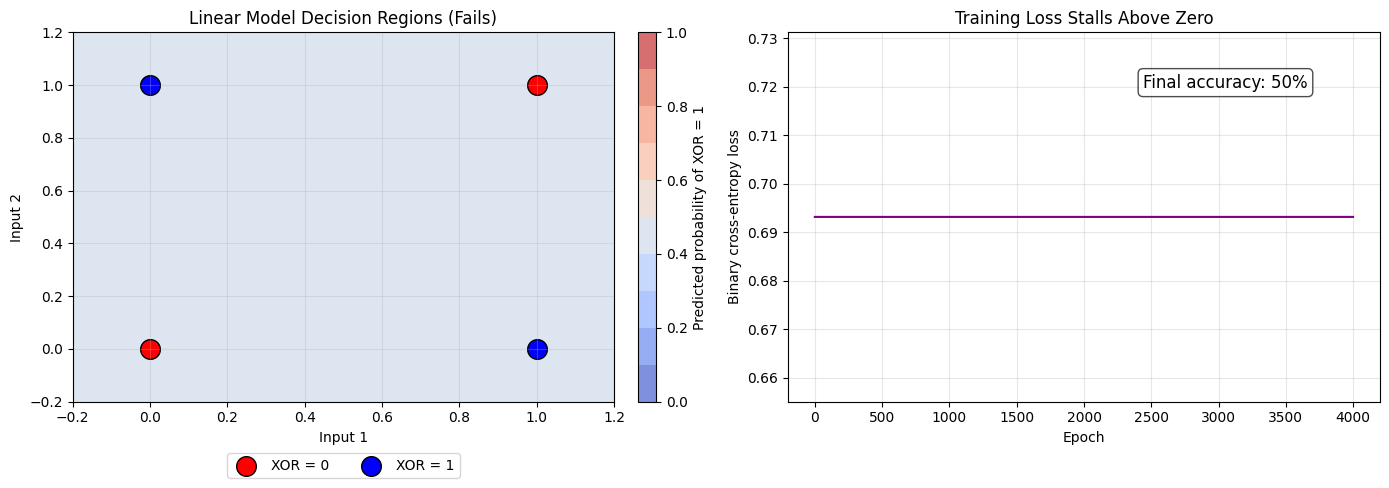

Logistic regression accuracy: 50.0%
Observation: A linear decision boundary cannot classify the XOR points correctly,
so the optimization stalls at ~50% accuracy even after many epochs.


In [10]:
# Train a logistic regression (linear) model to highlight its limitations on XOR
import numpy as np
import matplotlib.pyplot as plt

# Ensure dataset is available
if 'X' not in globals() or 'y' not in globals():
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([0, 1, 1, 0])

colors = ['red', 'blue']
learning_rate = 0.1
epochs = 4000

# Augment inputs with bias term for convenience
X_bias = np.hstack([X, np.ones((X.shape[0], 1))])
w = np.zeros(X_bias.shape[1])

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

loss_history = []
for epoch in range(epochs):
    logits = X_bias @ w
    probs = sigmoid(logits)
    grad = (X_bias.T @ (probs - y)) / len(y)
    w -= learning_rate * grad

    eps = 1e-8
    loss = -np.mean(y * np.log(probs + eps) + (1 - y) * np.log(1 - probs + eps))
    loss_history.append(loss)

# Evaluate on training points
train_probs = sigmoid(X_bias @ w)
train_preds = (train_probs > 0.5).astype(int)
train_accuracy = (train_preds == y).mean()

# Prepare a grid to visualize decision regions
xx, yy = np.meshgrid(np.linspace(-0.2, 1.2, 200), np.linspace(-0.2, 1.2, 200))
grid = np.c_[xx.ravel(), yy.ravel(), np.ones(xx.size)]
probs_grid = sigmoid(grid @ w).reshape(xx.shape)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
cs = axes[0].contourf(xx, yy, probs_grid, levels=np.linspace(0, 1, 11), cmap='coolwarm', alpha=0.7)
axes[0].contour(xx, yy, probs_grid, levels=[0.5], colors='black', linewidths=2, linestyles='--')
for i in range(2):
    mask = y == i
    axes[0].scatter(X[mask, 0], X[mask, 1], c=colors[i], label=f'XOR = {i}', s=200, edgecolor='k')
axes[0].set_xlabel('Input 1')
axes[0].set_ylabel('Input 2')
axes[0].set_title('Linear Model Decision Regions (Fails)')
axes[0].set_xlim(-0.2, 1.2)
axes[0].set_ylim(-0.2, 1.2)
axes[0].grid(True, alpha=0.3)
axes[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=2)
fig.colorbar(cs, ax=axes[0], fraction=0.046, pad=0.04, label='Predicted probability of XOR = 1')

axes[1].plot(loss_history, color='purple')
axes[1].set_title('Training Loss Stalls Above Zero')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Binary cross-entropy loss')
axes[1].grid(True, alpha=0.3)
axes[1].annotate(f'Final accuracy: {train_accuracy * 100:.0f}%', xy=(0.6, 0.85), xycoords='axes fraction', fontsize=12, bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
plt.tight_layout()
plt.show()

print(f'Logistic regression accuracy: {train_accuracy * 100:.1f}%')
print('Observation: A linear decision boundary cannot classify the XOR points correctly,')
print('so the optimization stalls at ~50% accuracy even after many epochs.')


### Deep Linear Network Without Activations

Stacking multiple **affine** layers but skipping nonlinear activations never increases expressivity—the whole stack collapses to another affine map. For two layers with weights $W_1, W_2$ and biases $b_1, b_2$ we have
\[
egin{aligned}
\mathbf{h}_1 &= W_1\, \mathbf{x} + b_1,\
\hat{y} &= W_2\, \mathbf{h}_1 + b_2 = W_2 W_1\, \mathbf{x} + (W_2 b_1 + b_2).
\end{aligned}
\]
The output is still a single matrix multiplied by the input plus a bias term. Repeating this argument for any number of affine layers shows
\[
\hat{y} = W_L W_{L-1} \cdots W_1\, \mathbf{x} + igg( \sum_{\ell=1}^{L} W_L W_{L-1} \cdots W_{\ell+1} b_\ell igg),
\]
which is just another linear separator in the original input space. Geometrically, every affine layer only rotates, scales, or shifts the hyperplane, so no amount of stacking can bend it around XOR’s four points without a nonlinearity.


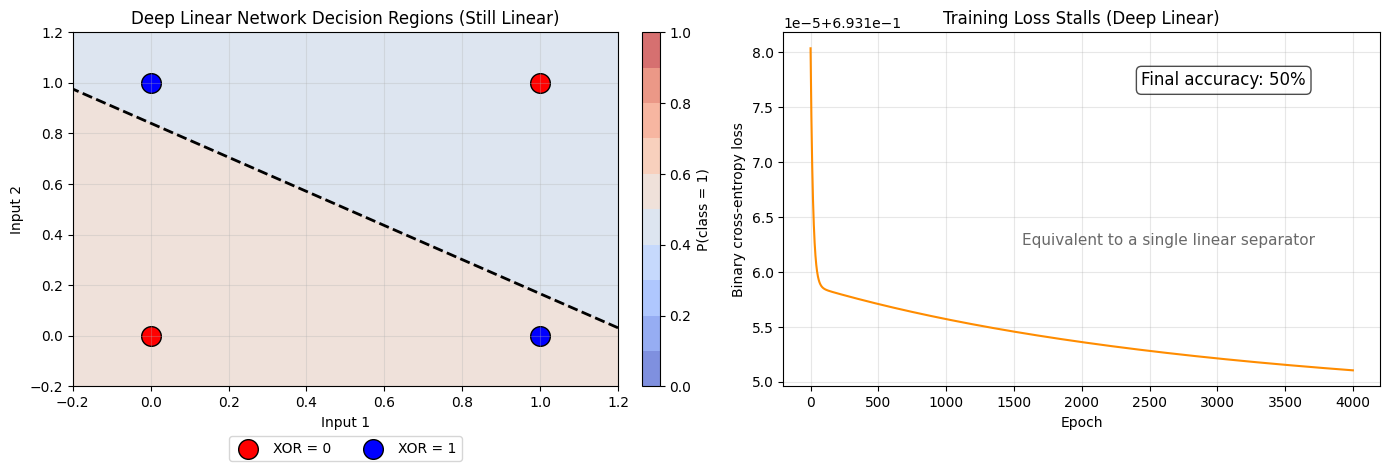

Deep linear network accuracy: 50.0%
Stacking affine layers without nonlinearities still yields a linear decision boundary:
Effective weight vector W_eff = [-0.00623121 -0.00924411]
Effective bias b_eff = 0.008


In [16]:
# Train a multi-layer linear network (no activations) and visualize its failure on XOR
rng = np.random.default_rng(0)
hidden_dims = [4, 4]
layer_sizes = [X.shape[1]] + hidden_dims + [1]
weights = [rng.normal(scale=0.2, size=(layer_sizes[i], layer_sizes[i+1])) for i in range(len(layer_sizes) - 1)]
biases = [np.zeros(layer_sizes[i+1]) for i in range(len(layer_sizes) - 1)]

learning_rate = 0.1
epochs = 4000
loss_history_linear = []

sigmoid = lambda z: 1.0 / (1.0 + np.exp(-z))

for epoch in range(epochs):
    activations = [X]
    for W, b in zip(weights[:-1], biases[:-1]):
        activations.append(activations[-1] @ W + b)
    logits = activations[-1] @ weights[-1] + biases[-1]
    probs = sigmoid(logits.squeeze())

    grad_logits = (probs - y)
    grad_logits_col = grad_logits[:, None]

    grad_W_last = activations[-1].T @ grad_logits_col / len(y)
    grad_b_last = grad_logits_col.mean(axis=0)

    grads_W = [None] * len(weights)
    grads_b = [None] * len(biases)
    grads_W[-1] = grad_W_last
    grads_b[-1] = grad_b_last

    grad_prev = grad_logits_col @ weights[-1].T
    for layer in range(len(weights) - 2, -1, -1):
        grads_W[layer] = activations[layer].T @ grad_prev / len(y)
        grads_b[layer] = grad_prev.mean(axis=0)
        if layer > 0:
            grad_prev = grad_prev @ weights[layer].T

    for i in range(len(weights)):
        weights[i] -= learning_rate * grads_W[i]
        biases[i] -= learning_rate * grads_b[i]

    eps = 1e-8
    loss = -np.mean(y * np.log(probs + eps) + (1 - y) * np.log(1 - probs + eps))
    loss_history_linear.append(loss)

train_preds_linear = (probs > 0.5).astype(int)
train_accuracy_linear = (train_preds_linear == y).mean()

# Compute effective single-layer parameters
W_eff = weights[0]
b_eff = biases[0][None, :]
for W, b in zip(weights[1:], biases[1:]):
    W_eff = W_eff @ W
    b_eff = b_eff @ W + b
W_eff = W_eff.reshape(X.shape[1], 1)
b_eff_scalar = float(b_eff.squeeze())

# Visualize decision regions from the deep linear stack
xx, yy = np.meshgrid(np.linspace(-0.2, 1.2, 200), np.linspace(-0.2, 1.2, 200))
linear_grid = np.c_[xx.ravel(), yy.ravel()]
logits_grid_linear = (linear_grid @ W_eff + b_eff_scalar).reshape(xx.shape)
probs_grid_linear = sigmoid(logits_grid_linear)
class_grid_linear = (probs_grid_linear > 0.5).astype(int)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
cs = axes[0].contourf(xx, yy, probs_grid_linear, levels=np.linspace(0, 1, 11), cmap='coolwarm', alpha=0.7)
axes[0].contour(xx, yy, probs_grid_linear, levels=[0.5], colors='black', linestyles='--', linewidths=2)
for i in range(2):
    mask = y == i
    axes[0].scatter(X[mask, 0], X[mask, 1], c=colors[i], s=200, edgecolor='k', label=f'XOR = {i}')
axes[0].set_title('Deep Linear Network Decision Regions (Still Linear)')
axes[0].set_xlabel('Input 1')
axes[0].set_ylabel('Input 2')
axes[0].set_xlim(-0.2, 1.2)
axes[0].set_ylim(-0.2, 1.2)
axes[0].grid(True, alpha=0.3)
axes[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=2)
fig.colorbar(cs, ax=axes[0], fraction=0.046, pad=0.04, label='P(class = 1)')

axes[1].plot(loss_history_linear, color='darkorange')
axes[1].set_title('Training Loss Stalls (Deep Linear)')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Binary cross-entropy loss')
axes[1].grid(True, alpha=0.3)
axes[1].annotate(f'Final accuracy: {train_accuracy_linear * 100:.0f}%', xy=(0.6, 0.85), xycoords='axes fraction',
                 fontsize=12, bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
axes[1].annotate('Equivalent to a single linear separator', xy=(0.4, 0.4), xycoords='axes fraction',
                 fontsize=11, color='dimgray')
plt.tight_layout()
plt.show()

print(f'Deep linear network accuracy: {train_accuracy_linear * 100:.1f}%')
print('Stacking affine layers without nonlinearities still yields a linear decision boundary:')
print(f'Effective weight vector W_eff = {W_eff.ravel()}')
print(f'Effective bias b_eff = {b_eff_scalar:.3f}')



## How ReLU Transforms Make XOR Solvable

Let's visualize how a hidden ReLU layer reshapes the XOR inputs. We first look at the decision boundary in the original input space, then step through the hidden-layer transformation to see how points move into a linearly separable configuration.


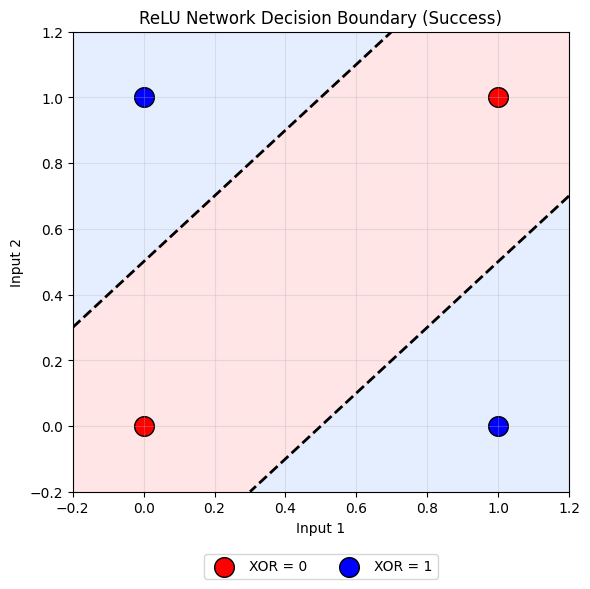

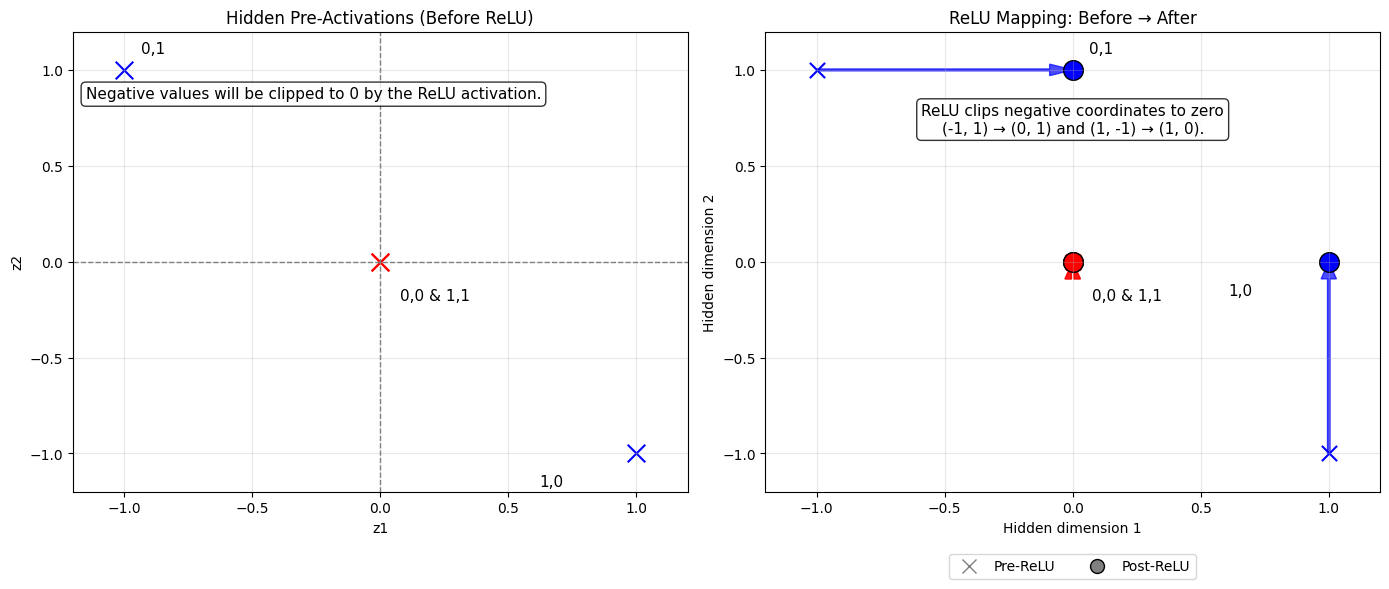

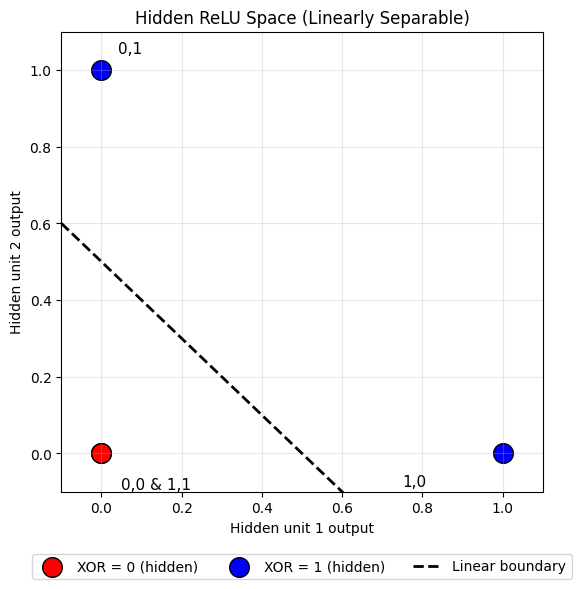

ReLU network accuracy: 100%
The hidden ReLU features make the classes linearly separable, enabling perfect classification.
Transformation summary:
Input | Pre-activation z | Post-ReLU h | Target y | Prediction ŷ
------+------------------+-------------+----------+-------------
0,0   | (0.0, 0.0)       | (0.0, 0.0)  | 0        | 0           
0,1   | (-1.0, 1.0)      | (0.0, 1.0)  | 1        | 1           
1,0   | (1.0, -1.0)      | (1.0, 0.0)  | 1        | 1           
1,1   | (0.0, 0.0)       | (0.0, 0.0)  | 0        | 0           


In [18]:
# Build a minimal two-layer ReLU network that can solve XOR and visualize its transformation
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

def relu(z):
    return np.maximum(0.0, z)

# Ensure dataset is available
if 'X' not in globals() or 'y' not in globals():
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([0, 1, 1, 0])

colors = ['red', 'blue']
class_labels = {0: 'XOR = 0', 1: 'XOR = 1'}

# Hand-crafted weights that implement XOR with a hidden ReLU layer
W1 = np.array([[1.0, -1.0],
               [-1.0, 1.0]])
b1 = np.array([0.0, 0.0])
W2 = np.array([[1.0],
               [1.0]])
b2 = -0.5

def forward_relu_network(inputs):
    hidden_raw = inputs @ W1.T + b1
    hidden = relu(hidden_raw)
    logits = hidden @ W2 + b2
    probs = 1.0 / (1.0 + np.exp(-logits))
    return probs.squeeze(), hidden, hidden_raw

def format_input_label(x_pair):
    return f"{int(x_pair[0])},{int(x_pair[1])}"

def collect_labels(points):
    grouped = {}
    for x_pair, point in zip(X, points):
        key = tuple(int(round(val)) for val in np.round(point, 6))
        grouped.setdefault(key, []).append(format_input_label(x_pair))
    return grouped

probs_relu, hidden_activations, hidden_raw = forward_relu_network(X)
preds_relu = (probs_relu > 0.5).astype(int)
relu_accuracy = (preds_relu == y).mean()

xx, yy = np.meshgrid(np.linspace(-0.2, 1.2, 200), np.linspace(-0.2, 1.2, 200))
input_grid = np.c_[xx.ravel(), yy.ravel()]
probs_grid_relu, _, _ = forward_relu_network(input_grid)
class_grid = (probs_grid_relu > 0.5).astype(int).reshape(xx.shape)
prob_surface = probs_grid_relu.reshape(xx.shape)

# Figure 1: decision boundary in input space (after ReLU network)
fig_decision, ax_decision = plt.subplots(figsize=(6, 6))
ax_decision.contourf(xx, yy, class_grid, levels=[-0.5, 0.5, 1.5],
                     colors=['#ffcccc', '#ccdfff'], alpha=0.5)
ax_decision.contour(xx, yy, prob_surface, levels=[0.5], colors='black',
                    linewidths=2, linestyles='--')
for i in range(2):
    mask = y == i
    ax_decision.scatter(X[mask, 0], X[mask, 1], c=colors[i], s=200,
                        edgecolor='k', label=class_labels[i])
ax_decision.set_title('ReLU Network Decision Boundary (Success)')
ax_decision.set_xlabel('Input 1')
ax_decision.set_ylabel('Input 2')
ax_decision.set_xlim(-0.2, 1.2)
ax_decision.set_ylim(-0.2, 1.2)
ax_decision.grid(True, alpha=0.3)
ax_decision.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=2)
plt.tight_layout()
plt.show()

# Figure 2: step-by-step hidden-layer transformation
fig_transform, axes_transform = plt.subplots(1, 2, figsize=(14, 6))
pre_label_map = collect_labels(hidden_raw)
axes_transform[0].axhline(0, color='gray', linestyle='--', linewidth=1)
axes_transform[0].axvline(0, color='gray', linestyle='--', linewidth=1)
for i in range(len(X)):
    axes_transform[0].scatter(hidden_raw[i, 0], hidden_raw[i, 1], marker='x',
                              color=colors[y[i]], s=160)
axes_transform[0].set_title('Hidden Pre-Activations (Before ReLU)')
axes_transform[0].set_xlabel('z1')
axes_transform[0].set_ylabel('z2')
axes_transform[0].set_xlim(-1.2, 1.2)
axes_transform[0].set_ylim(-1.2, 1.2)
axes_transform[0].grid(True, alpha=0.3)
axes_transform[0].text(-1.15, 0.85, 'Negative values will be clipped to 0 by the ReLU activation.',
                        fontsize=11, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
pre_offsets = {
    (-1, 1): (12, 12),
    (1, -1): (-70, -24),
    (0, 0): (14, -28)
}
for point, labels in pre_label_map.items():
    offset = pre_offsets.get(point, (10, 10))
    axes_transform[0].annotate(' & '.join(labels), np.array(point, dtype=float),
                               textcoords='offset points', xytext=offset, fontsize=11)

post_offsets = {
    (0, 0): (14, -28),
    (0, 1): (12, 12),
    (1, 0): (-72, -24)
}
post_label_map = collect_labels(hidden_activations)
for i in range(len(X)):
    start = hidden_raw[i]
    end = hidden_activations[i]
    axes_transform[1].arrow(start[0], start[1], end[0] - start[0], end[1] - start[1],
                            color=colors[y[i]], width=0.01, head_width=0.06,
                            length_includes_head=True, alpha=0.7)
    axes_transform[1].scatter(start[0], start[1], marker='x', color=colors[y[i]], s=120)
    axes_transform[1].scatter(end[0], end[1], color=colors[y[i]], edgecolor='k', s=200)
for point, labels in post_label_map.items():
    offset = post_offsets.get(point, (10, 10))
    axes_transform[1].annotate(' & '.join(labels), np.array(point, dtype=float),
                               textcoords='offset points', xytext=offset, fontsize=11)
axes_transform[1].set_title('ReLU Mapping: Before → After')
axes_transform[1].set_xlabel('Hidden dimension 1')
axes_transform[1].set_ylabel('Hidden dimension 2')
axes_transform[1].set_xlim(-1.2, 1.2)
axes_transform[1].set_ylim(-1.2, 1.2)
axes_transform[1].grid(True, alpha=0.3)
legend_handles = [
    Line2D([0], [0], marker='x', color='w', markerfacecolor='gray', markeredgecolor='gray',
           markersize=10, label='Pre-ReLU'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markeredgecolor='k',
           markersize=10, label='Post-ReLU')
]
axes_transform[1].legend(handles=legend_handles, loc='upper center',
                          bbox_to_anchor=(0.5, -0.12), ncol=2)
axes_transform[1].text(
    0.5, 0.78,
    'ReLU clips negative coordinates to zero\n(-1, 1) → (0, 1) and (1, -1) → (1, 0).',
    transform=axes_transform[1].transAxes, fontsize=11,
    ha='center',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)
plt.tight_layout()
plt.show()

# Figure 3: hidden-layer space after ReLU (final separability)
fig_hidden, ax_hidden = plt.subplots(figsize=(6, 6))
ax_hidden.scatter(hidden_activations[y == 0, 0], hidden_activations[y == 0, 1],
                  color=colors[0], s=200, edgecolor='k', label='XOR = 0 (hidden)')
ax_hidden.scatter(hidden_activations[y == 1, 0], hidden_activations[y == 1, 1],
                  color=colors[1], s=200, edgecolor='k', label='XOR = 1 (hidden)')
h_line = np.linspace(-0.1, 1.1, 100)
ax_hidden.plot(h_line, 0.5 - h_line, 'k--', linewidth=2, label='Linear boundary')
ax_hidden.set_xlim(-0.1, 1.1)
ax_hidden.set_ylim(-0.1, 1.1)
ax_hidden.set_xlabel('Hidden unit 1 output')
ax_hidden.set_ylabel('Hidden unit 2 output')
ax_hidden.set_title('Hidden ReLU Space (Linearly Separable)')
ax_hidden.grid(True, alpha=0.3)
hidden_offsets = {
    (0, 0): (14, -26),
    (0, 1): (12, 12),
    (1, 0): (-72, -24)
}
for point, labels in post_label_map.items():
    offset = hidden_offsets.get(point, (10, 10))
    ax_hidden.annotate(' & '.join(labels), np.array(point, dtype=float),
                       textcoords='offset points', xytext=offset, fontsize=11)
ax_hidden.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=3)
plt.tight_layout()
plt.show()

print(f'ReLU network accuracy: {relu_accuracy * 100:.0f}%')
print('The hidden ReLU features make the classes linearly separable, enabling perfect classification.')

rows = []
for x_val, z_val, h_val, target, pred in zip(X, hidden_raw, hidden_activations, y, preds_relu):
    rows.append((
        format_input_label(x_val),
        f"({z_val[0]:.1f}, {z_val[1]:.1f})",
        f"({h_val[0]:.1f}, {h_val[1]:.1f})",
        int(target),
        int(pred)
    ))

header = ('Input', 'Pre-activation z', 'Post-ReLU h', 'Target y', 'Prediction ŷ')
col_widths = [max(len(str(row[i])) for row in ([header] + rows)) for i in range(len(header))]

def format_row(values):
    return " | ".join(str(value).ljust(width) for value, width in zip(values, col_widths))

print('Transformation summary:')
print(format_row(header))
print('-+-'.join('-' * width for width in col_widths))
for row in rows:
    print(format_row(row))


